<a href="https://colab.research.google.com/github/eudoxiamoura/CG-OpenCV/blob/main/Minicurso_FundamentosCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile

In [30]:

file_url = "https://drive.google.com/file/d/1hVLD_wNsRWnRSTV2EOvnPSD53K27zNBh/view?usp=drive_link"
file_name = "pasto.jpg"

# Baixando o arquivo
response = requests.get(file_url)
if response.status_code == 200:
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"Arquivo {file_name} baixado com sucesso!")
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")

Arquivo pasto.jpg baixado com sucesso!


# Limiarização

TypeError: Image data of dtype object cannot be converted to float

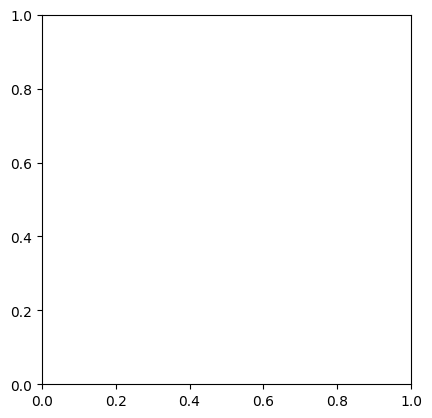

In [28]:
#ler imagem
img = cv2.imread('pasto.jpg')
#mostrar imagem
plt.imshow(img)

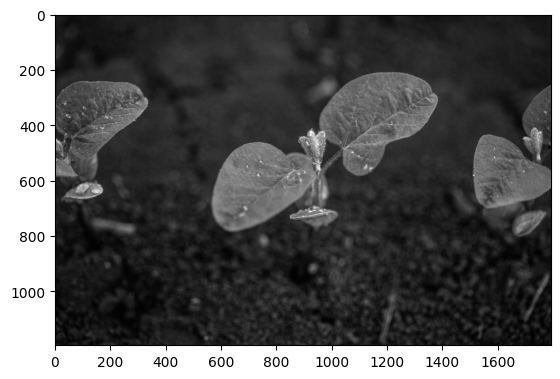

In [ ]:
#converter cinza
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#mostrar imagem
plt.imshow(gray, cmap='gray')

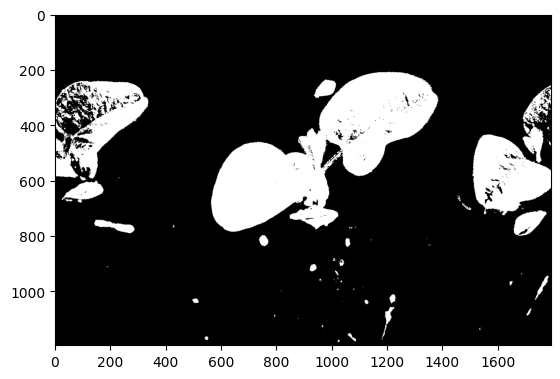

In [ ]:
_, img_thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh, cmap='gray')

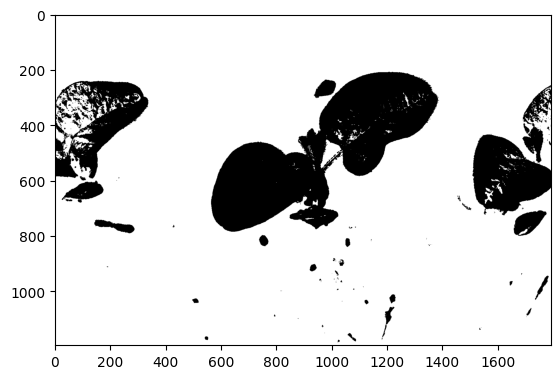

In [ ]:
_, img_thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_thresh, cmap='gray')

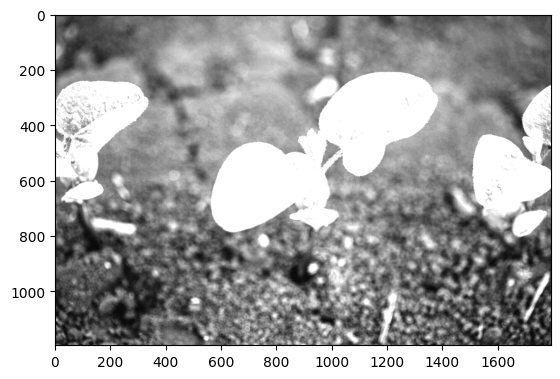

In [ ]:
_, img_thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_TRUNC)
plt.imshow(img_thresh, cmap='gray')

# OTSU

In [ ]:
desfoque = cv2.GaussianBlur(gray, (5,5), 0)


81.0


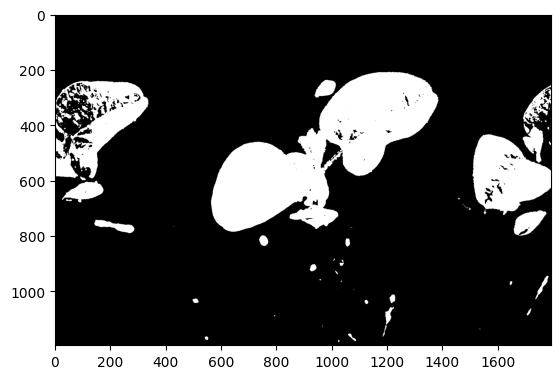

In [ ]:
limiar_otsu, img_otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(limiar_otsu)
plt.imshow(img_otsu, cmap='gray')

In [ ]:
histograma, bins = np.histogram(gray, 256, [0,256])
histograma


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     2,    19,   587,
        6126,  4839,  6547,  8232,  9642, 10775, 12075, 14119, 15429,
       17572, 18233, 19238, 20531, 23146, 26663, 30080, 34094, 34524,
       36439, 38604, 40503, 42344, 43536, 47013, 48042, 49157, 50198,
       50453, 52487, 52787, 57867, 55332, 53830, 55623, 55573, 56462,
       56539, 58518, 55352, 50367, 44895, 40177, 36410, 33158, 31408,
       26839, 22925, 18849, 15781, 13209, 10745,  9454,  7715,  6716,
        5927,  5479,  5094,  4972,  4838,  4851,  4833,  4794,  4861,
        4576,  4587,  4423,  4169,  4039,  4145,  4093,  4107,  3920,
        3933,  4056,  3893,  4024,  4052,  4015,  4322,  4282,  4549,
        4671,  4885,  5113,  5242,  5452,  5723,  5847,  6305,  6627,
        6783,  7181,  7326,  7553,  7722,  7810,  7887,  7931,  7892,
        7952,  7714,  7837,  7562,  7238,  7316,  7130,  6954,  6868,
        6535,  6106,

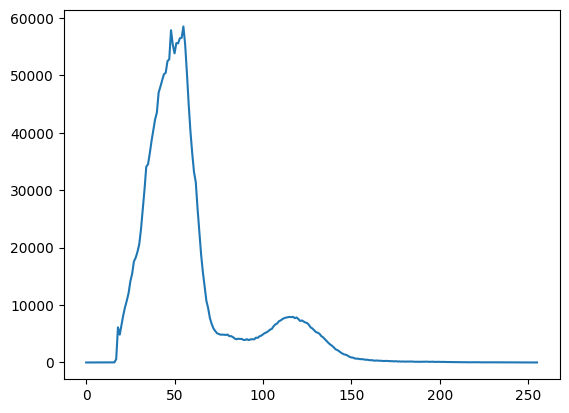

In [ ]:
plt.plot(histograma)

#Segmentações baseado em bordas

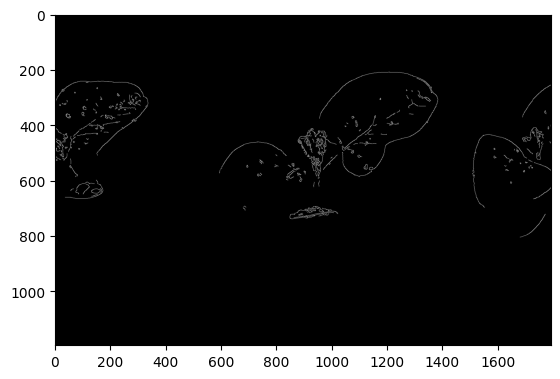

In [ ]:
desfoque = cv2.GaussianBlur(gray, (5, 5), 0)
canny = cv2.Canny(desfoque, 80, 140)

plt.imshow(canny, cmap='gray')

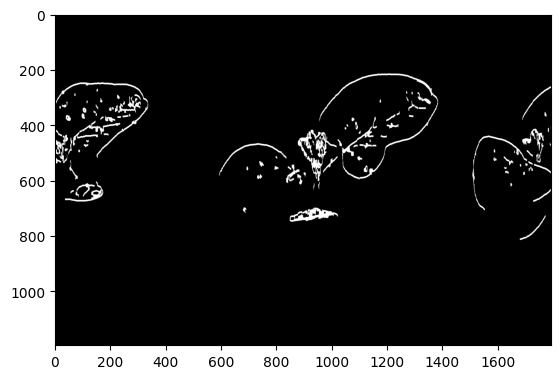

In [ ]:
dilatacao = cv2.dilate(canny, (9, 9), iterations=10)
erosao = cv2.erode(dilatacao, (9, 9), iterations=5)

plt.imshow(erosao, cmap='gray')